<a href="https://colab.research.google.com/github/itzwow/ECE715_ML/blob/main/Assignments/Assignment1_prob1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
raw_data = fetch_california_housing()

In [5]:
print(raw_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [6]:
print(raw_data['target'])

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [7]:
print(raw_data['feature_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
print(raw_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [9]:
df=pd.DataFrame(raw_data['data'],columns=raw_data['feature_names'])

In [10]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4599,1.3169,47.0,2.153094,1.169381,1406.0,4.579805,34.05,-118.27
313,2.7159,45.0,5.306590,1.126074,1132.0,3.243553,37.77,-122.19
5245,7.9835,27.0,8.187817,1.015228,497.0,2.522843,34.09,-118.43
19118,3.4500,52.0,5.573913,1.139130,910.0,2.637681,38.23,-122.65
17707,4.1165,26.0,4.937500,0.998047,2677.0,5.228516,37.32,-121.81


In [11]:
print(df.keys())

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [12]:
print(df.describe()) #statistics of the dataframe

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

In [13]:
from sklearn.preprocessing import StandardScaler


In [14]:
x_std = StandardScaler().fit_transform(df)


In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA()

In [17]:
x_pca = pca.fit_transform(x_std, 2)

In [18]:
x_std.shape

(20640, 8)

In [19]:
x_pca.shape


(20640, 8)

In [20]:
x_pca


array([[ 1.88270434, -0.50336186, -0.31413445, ...,  0.48517721,
         0.09122647, -0.13781179],
       [ 1.37111955, -0.12140565,  1.90525769, ...,  0.60512257,
         0.26308612, -0.18222091],
       [ 2.08686762, -0.5011357 , -0.93724479, ...,  1.15867615,
        -0.29515871,  0.16980024],
       ...,
       [ 1.40235696, -1.09642559,  0.56713524, ..., -1.05218875,
        -0.42028867, -0.29016593],
       [ 1.5429429 , -1.05940835,  0.36547242, ..., -1.12158069,
        -0.34986673, -0.30442507],
       [ 1.40551621, -0.89672727,  0.89681183, ..., -0.81877823,
        -0.3095505 , -0.3824435 ]])

Text(0, 0.5, 'Second principle component')

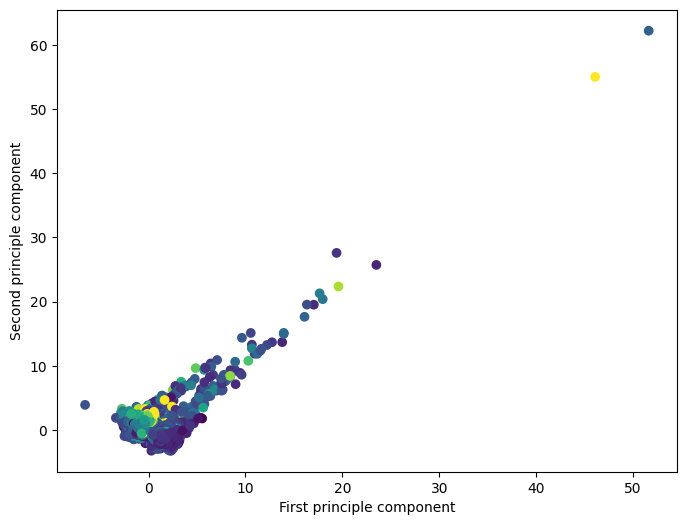

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=raw_data['target'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')


In [22]:
pca.components_.shape

(8, 8)

In [23]:
pca.explained_variance_ratio_

array([0.25336868, 0.23516245, 0.15888635, 0.12887971, 0.12538195,
       0.0824225 , 0.01020022, 0.00569814])

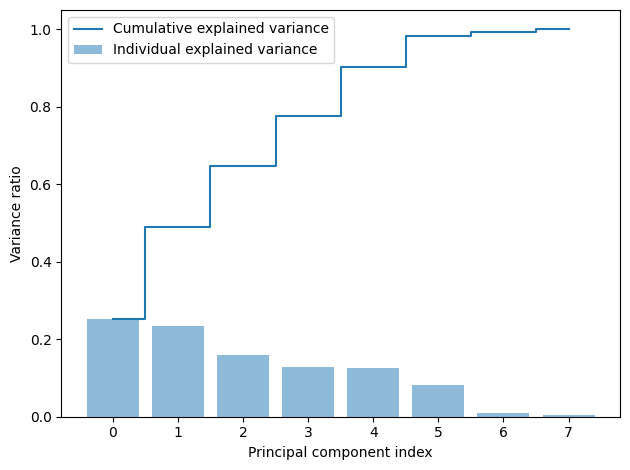

In [24]:
var_exp=pca.explained_variance_ratio_

# Plot the explained variance against cumulative explained variance

import matplotlib.pyplot as plt
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [25]:
pca = PCA()

In [26]:
x_pca = pca.fit_transform(x_std)

In [28]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [32]:
d = np.argmax(cumsum>=0.8)+1
d

5